In [2]:
from pathlib import Path

import cv2
import librosa
import numpy as np
import pandas as pd
import soundfile as sf
import torch.utils.data as data
import os

from tqdm import tqdm
%matplotlib inline
import matplotlib.pyplot as plt

In [25]:
df = pd.read_csv("../input/birdsong-recognition/train_32000.csv")

In [92]:
idx = ys.argsort()[2]
PERIOD = 6
sample = df.loc[idx, :]
wav_name = sample["resampled_filename"]
ebird_code = sample["ebird_code"]
y, sr = sf.read(os.path.join("../input/train_audio_resampled_32000/",  ebird_code ,  wav_name))

len_y 14592
start position 109281, len 192000
melspec size (128, 376)


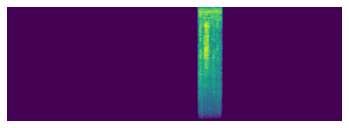

In [93]:
len_y = len(y)
print(f"len_y {len_y}")
effective_length = sr * PERIOD
if len_y < effective_length:
    new_y = np.zeros(effective_length, dtype=y.dtype)
    start = np.random.randint(effective_length - len_y)
    new_y[start:start + len_y] = y
    y_crop = new_y.astype(np.float32)
elif len_y > effective_length:
    start = np.random.randint(len_y - effective_length)
    y_crop = y[start:start + effective_length].astype(np.float32)
else:
    y_crop = y.astype(np.float32)
print(f"start position {start}, len {len(y_crop)}")
melspec = librosa.feature.melspectrogram(y_crop, sr=sr, **{})
melspec = librosa.power_to_db(melspec).astype(np.float32)
print(f"melspec size {melspec.shape}")
plt.axis('off')
plt.imshow(melspec)

len_y 14592
start position 6492, len 192000
melspec size (128, 376)


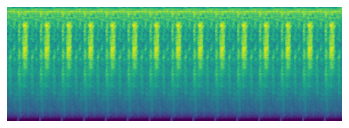

In [94]:
len_y = len(y)
print(f"len_y {len_y}")
pad = 1000
effective_length = sr * PERIOD
y_crop = np.tile(y[pad :-pad ], (effective_length // (len_y-pad *2) + 1,))
start = np.random.randint(len(y_crop) - effective_length)
y_crop = y_crop[start:start + effective_length].astype(np.float32)
print(f"start position {start}, len {len(y_crop)}")
melspec = librosa.feature.melspectrogram(y_crop, sr=sr, **{})
melspec = librosa.power_to_db(melspec).astype(np.float32)
print(f"melspec size {melspec.shape}")
plt.axis('off')
plt.imshow(melspec)

In [5]:
# ys = []

# for idx in tqdm(range(len(df))):
#     sample = df.loc[idx, :]
#     wav_name = sample["resampled_filename"]
#     ebird_code = sample["ebird_code"]
#     y, sr = sf.read(os.path.join("../input/train_audio_resampled_32000/",  ebird_code ,  wav_name))
#     ys.append(len(y))

100%|██████████| 21375/21375 [13:25<00:00, 26.55it/s]  


In [7]:
print(f"min length {min(ys)} max length {max(ys)} mean length {sum(ys) / len(ys)}")

min length 12539 max length 73085952 mean length 1800873.0899649123


In [29]:
df.columns.values

array(['rating', 'playback_used', 'ebird_code', 'channels', 'date',
       'pitch', 'duration', 'filename', 'speed', 'species',
       'number_of_notes', 'title', 'secondary_labels', 'bird_seen',
       'sci_name', 'location', 'latitude', 'sampling_rate', 'type',
       'elevation', 'description', 'bitrate_of_mp3', 'file_type',
       'volume', 'background', 'xc_id', 'url', 'country', 'author',
       'primary_label', 'longitude', 'length', 'time', 'recordist',
       'license', 'resampled_sampling_rate', 'resampled_filename',
       'resampled_channels'], dtype=object)

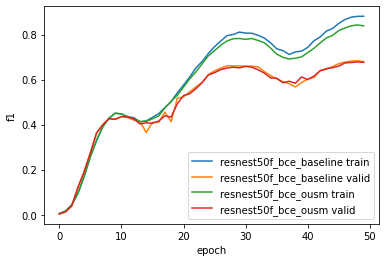

In [40]:
config = "resnest50f_bce_baseline"
train_log = pd.read_csv(f"../logs/{config}/fold0/logs/train_log.csv")
valid_log = pd.read_csv(f"../logs/{config}/fold0/logs/valid_log.csv")

plt.plot(train_log.epoch.values, train_log.f1.values, label=f"{config} train")
plt.plot(valid_log.epoch.values, valid_log.f1.values, label=f"{config} valid")

config = "resnest50f_bce_ousm"
train_log = pd.read_csv(f"../logs/{config}/fold0/logs/train_log.csv")
valid_log = pd.read_csv(f"../logs/{config}/fold0/logs/valid_log.csv")

plt.plot(train_log.epoch.values, train_log.f1.values, label=f"{config} train")
plt.plot(valid_log.epoch.values, valid_log.f1.values, label=f"{config} valid")

plt.xlabel("epoch")
plt.ylabel("f1")
plt.legend()